In [25]:
import os
print(os.listdir())


['.ipynb_checkpoints', 'AB_NYC_2019.csv', 'assignment1_dai.ipynb']


In [26]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 

df = pd.read_csv("AB_NYC_2019.csv")  
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [27]:
print("Dataset Shape:", df.shape)

print("\nColumn Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())


Dataset Shape: (48895, 16)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int6

In [28]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [29]:
print("\nUnique Neighborhood Groups:", df['neighbourhood_group'].unique())
print("Unique Room Types:", df['room_type'].unique())


Unique Neighborhood Groups: ['Brooklyn' 'Manhattan' 'Queens' 'Staten Island' 'Bronx']
Unique Room Types: ['Private room' 'Entire home/apt' 'Shared room']


UNIVARIATE ANALYSIS

In [30]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


1.Histogram: Distribution of Prices -
This will help identify common price ranges and outliers.

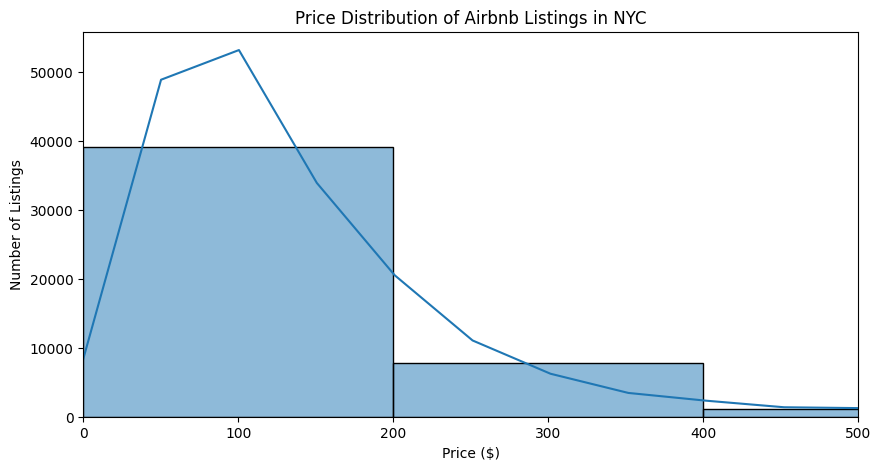

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(df['price'], bins=50, kde=True)
plt.xlim(0, 500)  
plt.title("Price Distribution of Airbnb Listings in NYC")
plt.xlabel("Price ($)")
plt.ylabel("Number of Listings")
plt.show()


2.Boxplot: Detecting Outliers in Price (unusual high or low values)

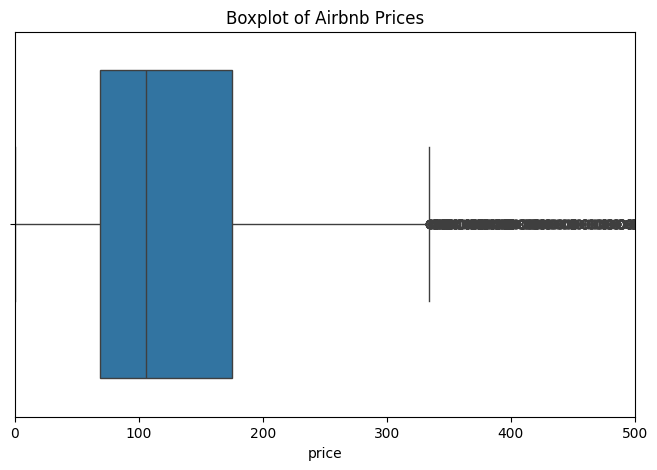

In [32]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['price'])
plt.xlim(0, 500)  
plt.title("Boxplot of Airbnb Prices")
plt.show()


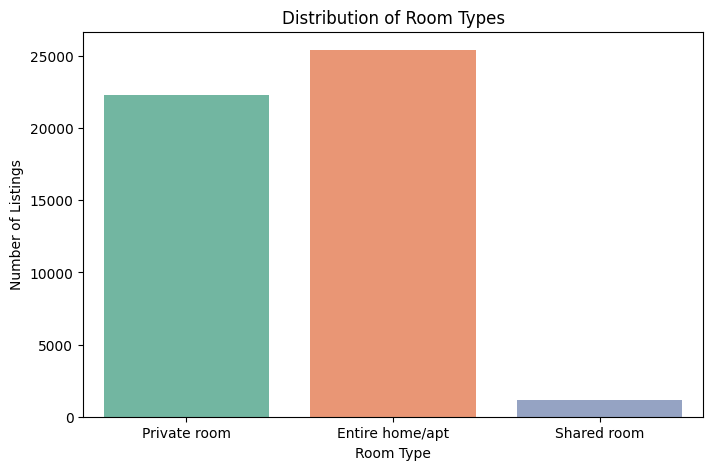

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="room_type", hue="room_type", legend=False, palette="Set2")
plt.title("Distribution of Room Types")
plt.xlabel("Room Type")
plt.ylabel("Number of Listings")
plt.show()


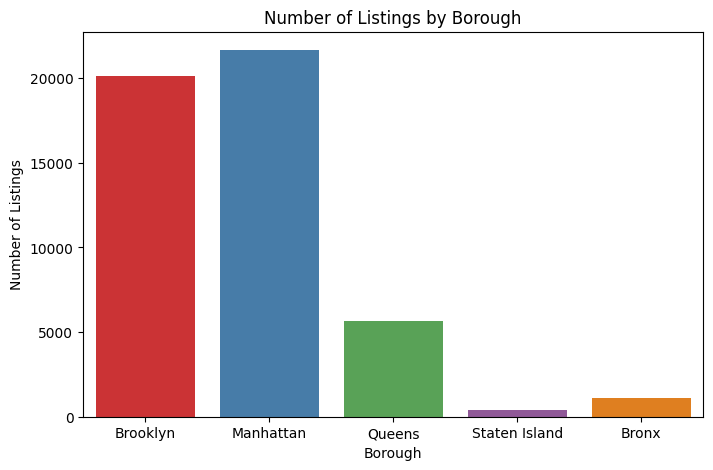

In [34]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="neighbourhood_group", hue="neighbourhood_group", legend=False, palette="Set1")
plt.title("Number of Listings by Borough")
plt.xlabel("Borough")
plt.ylabel("Number of Listings")
plt.show()


MULTIVARIATE ANALYSIS

1.A correlation matrix shows that the values close to +1 or -1 are strongly correlated.

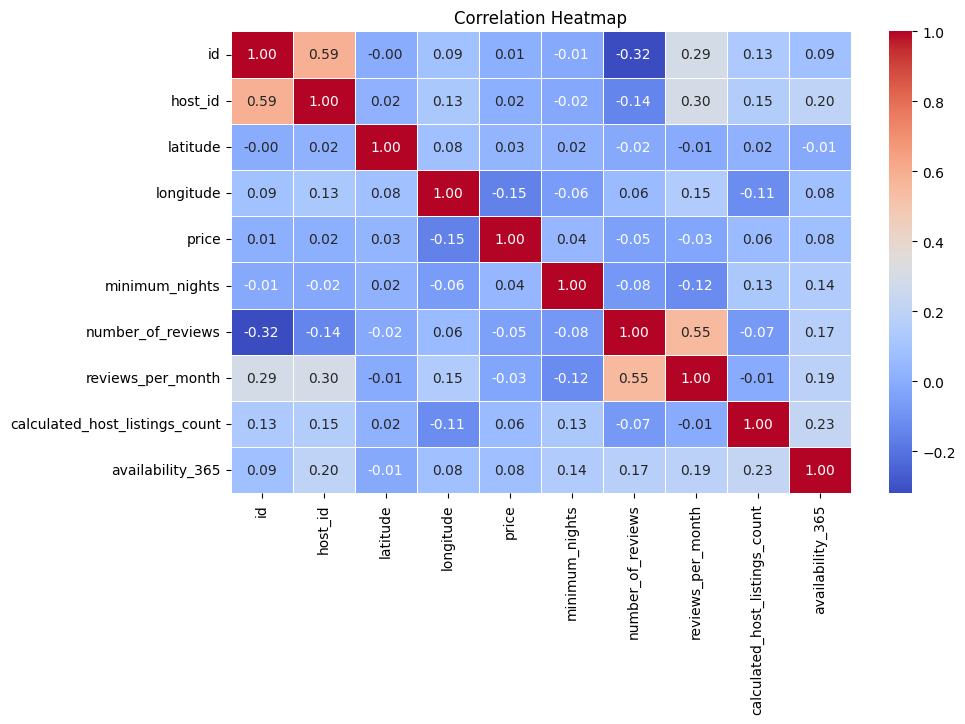

In [35]:
plt.figure(figsize=(10,6))
numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


2. A boxplot helps compare price distributions across different room types like which room type is more expensive.

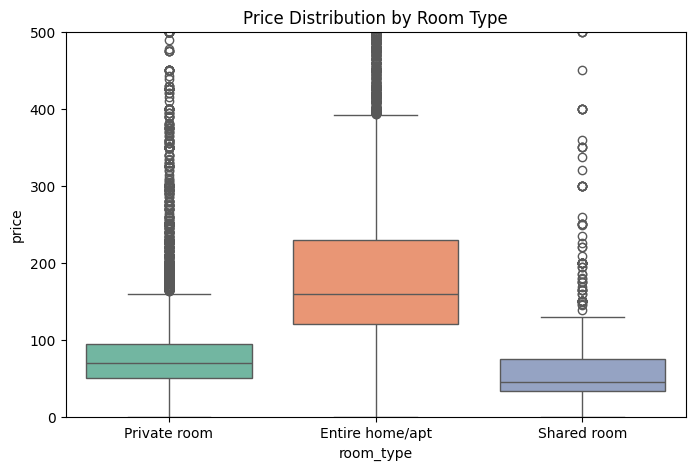

In [36]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="room_type", y="price", hue="room_type", legend=False, palette="Set2")
plt.ylim(0, 500)  
plt.title("Price Distribution by Room Type")
plt.show()


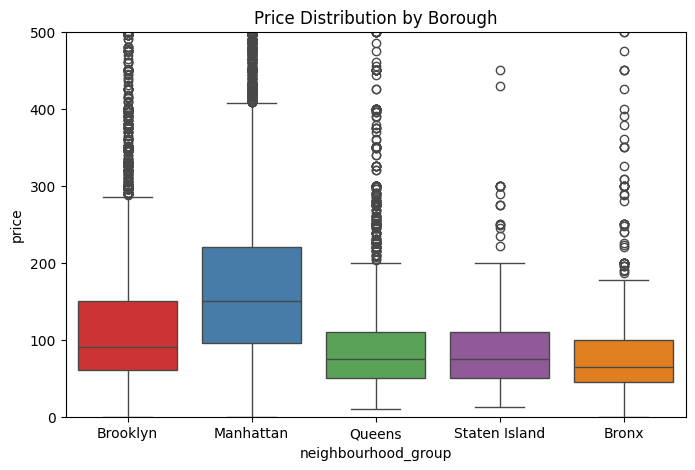

In [37]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="neighbourhood_group", y="price", hue="neighbourhood_group", legend=False, palette="Set1")
plt.ylim(0, 500) 
plt.title("Price Distribution by Borough")
plt.show()


3.A scatter plot helps us see if cheaper listings get more reviews.

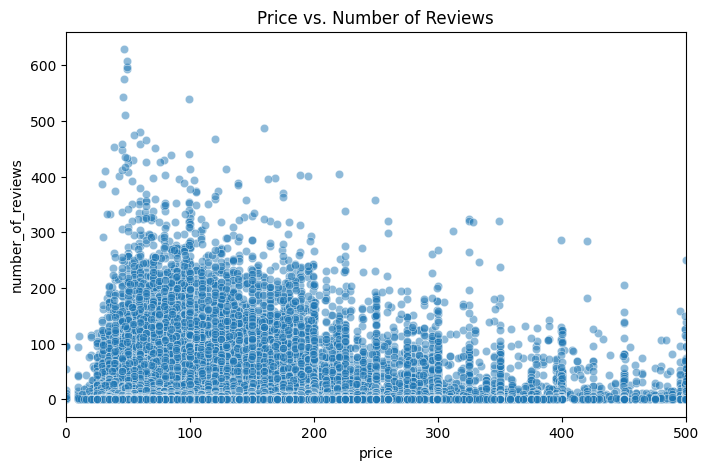

In [38]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="price", y="number_of_reviews", alpha=0.5)
plt.xlim(0, 500)  
plt.title("Price vs. Number of Reviews")
plt.show()


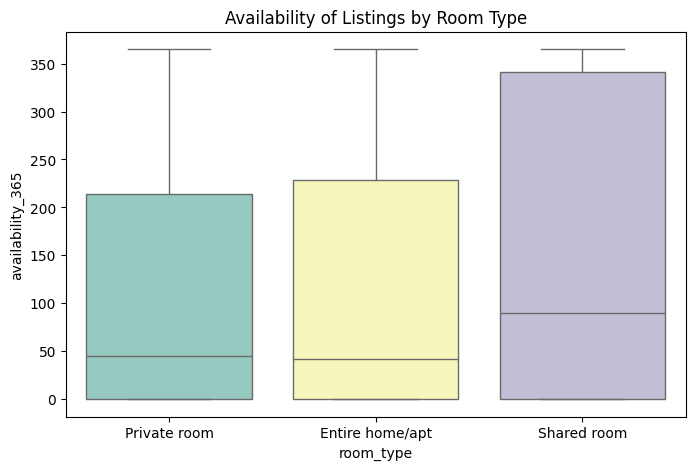

In [39]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="room_type", y="availability_365", hue="room_type", legend=False, palette="Set3")
plt.title("Availability of Listings by Room Type")
plt.show()



TRENDS AND DISCUSSIONS

The dataset consists of 48,895 Airbnb listings in New York City, containing 16 features related to host details, pricing, location, and reviews. A preliminary inspection of the dataset revealed that while most columns are complete, some have missing values, particularly in 'name' (16), 'host_name' (21), 'last_review' (10,052), and 'reviews_per_month' (10,052). The missing values in 'last_review' and 'reviews_per_month' suggest that many listings have never been reviewed. The dataset contains five boroughs—Brooklyn, Manhattan, Queens, Staten Island, and the Bronx. Among them, Manhattan and Brooklyn dominate in terms of listings, which is expected given their popularity among tourists.

The price distribution shows significant variability. The average price is dollar 152.72,  the presence of extreme values, including a maximum price of dollar 10,000, suggests that some listings are outliers. The minimum price is dollar 0, which may indicate incorrect or missing data. Given the high  standard deviation (dollar 240.15), further investigation into price outliers is necessary. The median price ($106) is significantly lower than the mean, indicating a right-skewed distribution where a few high-priced listings pull up the average.

When analyzing room types, the majority of listings are either Entire Home/Apt or Private Room, with Shared Rooms forming a small percentage. A boxplot of price vs. room type shows that Entire Homes/Apartments tend to be the most expensive, followed by Private Rooms, while Shared Rooms are the cheapest. A similar analysis across neighborhood groups shows that Manhattan has the highest-priced listings, followed by Brooklyn, while the Bronx and Staten Island have the lowest-priced listings.

A count plot of room types showed that most Airbnb listings offer Private Rooms or Entire Homes/Apartments, with Shared Rooms being rare.